# **Exploratory Data Analysis  and Machine Learning techniques - Predicting student's dropout and academic success**

## **ABSTRACT**
The exploratory data analysis (EDA) presented in this report aims to provide insights on a  housing dataset which records the sale prices of individual residential properties in a small town in USA between 2006 and 2010. The dataset consists of two text files, Housing_1.txt and Housing_2.txt. Our goal is to find significant patterns, relationships, and possible outliers in the dataset by utilizing a variety of data cleaning, wrangling, and analysis techniques in python. This analysis helps us in understanding the main variables affecting the sale of the individual residential properties.

## **INTRODUCTION**
The initial stage in managing intricate datasets is doing exploratory data analysis. The housing data set consists of information related to the sale of the property with multiple attributes and features such as square feet of the living area, Overall Condition of the house, the year in which the property has been built, neighbourhood and so on. The dataset is split across two different text files which are tab separated. The analysis seeks to combine and explore these files to gain a comprehensive understanding of the housing data on the factor that really influences the sale price of a individual property.

### **Background Analysis of the dataset**
The properties were sold over the time span of five years from 2006 to 2010, so we need to analyse over the period of years. From these two files, we understand that there are 2939 observations and 82 variables.
<br/>
Before delving into the analysis, we need to look at the “**Special Notes**” given in the dictionary file, which provides the following information:
<br/>
'There are five observations that can be removed from the data set(which can be easily identified by looking at the scatter plot of the SALE PRICE variable and GR LIV AREA). There are two odd sales (very large houses at reasonable prices), and three outliers.”`
<br/>
We need to consider this information while doing our analysis.




## **Objectives**
The primary objectives of this exploratory data analysis are as follows:
*   Ingest and merge the two datasets to create a single DataFrame.
*  Clean and preprocess the data, handling missing values, duplicates, and outliers.
*   Explore the distribution of key numerical variables and identify patterns.
*   Explore the distribution of key categorical variables and identify the patterns.
*   Investigate the relationship between various factors and the sale price of houses.
*   Identify potential outliers and anomalies in the dataset.
*   Identify correlations between the variables.
*   Provide visualizations and summary statistics to facilitate a comprehensive understanding of the housing data.






### **Importing Libraries**
The first step in performing the Exploratory Data Analysis is to import the necessary libraries. We import the following libraries for our analysis.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Mounting the google dirve to read the file from the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Ingestion**
Data ingestion is a process that involves gathering and importing data(from various sources) and storing it for subsequent extraction, transformation, and loading of the data.
<br/>
There are two different txt files `(Housing_1.txt and Housing_2.txt)` provided for this  analysis. To separate the variables, Tab characters are used in these data files.
<br/>
Let's load the data from the each text file into a separate data frame and merge these two data frame into single data frame for house price prediction analysis.

In [ ]:
df_student = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student_Dropout.csv')

## **DATA OVERVIEW**
Let's print the initial overview of the dataset i.e.,
*   Basic information about the data
*   Shape of the data
*   Column Names
*   Type of the variables
    1.   Numerical
    2.   Categorical





In [ ]:
# Displaying the first few rows of the housprice dataset
df_student.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Getting the basic information about the houseprice dataset
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Let's print the shape of our houseprice data frame
df_student.shape

(4424, 37)

In [ ]:
#Print all the column names in our houseprice data frame
df_student.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
df_student

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Identify the Numerical and Categorical Columns
Let's identify the numerical and Categorical columns in the data set to perform the data cleaning.

In [ ]:
#Let's Identify all the numerical columns in our houseprice data frame
numeric_cols = df_student.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("List of Numercial columns in the data frame:")
print(numeric_cols)

#Let's Identify the Categorial columns in the dataframe
categorical_columns = df_student.select_dtypes(include=['object']).columns.tolist()
print()
print("List of Categorial columns in the data frame:")
print(categorical_columns)

List of Numercial columns in the data frame:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', '

## **Data Cleaning and Preprocessing**
Data cleaning and preprocessing are essential phases in data analysis that guarantee the data is correct, consistent, and prepared for analysis. Some typical preprocessing and data cleaning tasks are as follows:
*   Handling Missing Values
*   Removing Duplicates
*   Handling Outliers



### Checking the Null Values
Let's identify the null values present in the dataframe.
<br/>
The next code cell will show  if any of the 2939 rows have a null value in each of the 82 columns.

In [ ]:
#is any row NULL ?
df_student.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [ ]:
#Below code is to identify the data points in each column that are null
df_student.isnull().sum(axis=0)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

There are no null values in this dataset

### Identify and drop Duplicates
We need to identify any duplicate values present in the dataset and remove them accordingly.

In [ ]:
# drop any duplicate rows
print(f"Before removing duplicates:  {df_student.shape}\n")
df3 = df_student.drop_duplicates()
print(f"After removing duplicates:  {df_student.shape}")

Before removing duplicates:  (4424, 37)

After removing duplicates:  (4424, 37)


Since the shape of dataframe is not changed, there were no duplicate present in the dataset.

### **Identify outliers and unusual observations**
Outlier detection and removal is an essential phase in the data analysis process because, if it is done incorrectly, it will have a major negative impact on the prediction of the dataset.
<br/>
Z-score, frequency count, and scatter plot methods are the methods used in this analysis for the purpose of detecting outliers.


Let's analyse and identify the outliers and any unusual observations in the housing dataset.
<br/>
We can detect the outliers as below:

*   For numerical columns using the z-score value by setting the threshold value.
*   For categorical columns using the frequency count.

*  Using the scatter plot for numerical and categorical variables.






In [ ]:
# Detect Outliers in Numerical Columns using Z-Score
## The common threshold is 3, indicating values more than 3 standard deviations from the mean.
# Calculate z-scores for each numerical column
numerical_columns_1 = df_student.select_dtypes(include=[np.number])
for col in numerical_columns_1:
    z_scores = np.abs(stats.zscore(df_student[col]))
    outliers = df_student[z_scores > 3]
    if(outliers.shape[0] > 0):
      print(col, outliers.shape[0])

Marital status 126
Application order 138
Course 227
Previous qualification 308
Previous qualification (grade) 21
Nacionality 74
Mother's occupation 112
Father's occupation 177
Admission grade 22
Educational special needs 51
Age at enrollment 101
International 110
Curricular units 1st sem (credited) 149
Curricular units 1st sem (enrolled) 106
Curricular units 1st sem (evaluations) 60
Curricular units 1st sem (approved) 61
Curricular units 1st sem (without evaluations) 62
Curricular units 2nd sem (credited) 110
Curricular units 2nd sem (enrolled) 82
Curricular units 2nd sem (evaluations) 43
Curricular units 2nd sem (approved) 23
Curricular units 2nd sem (without evaluations) 94


<ipython-input-242-cfa2282765b1>:24: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


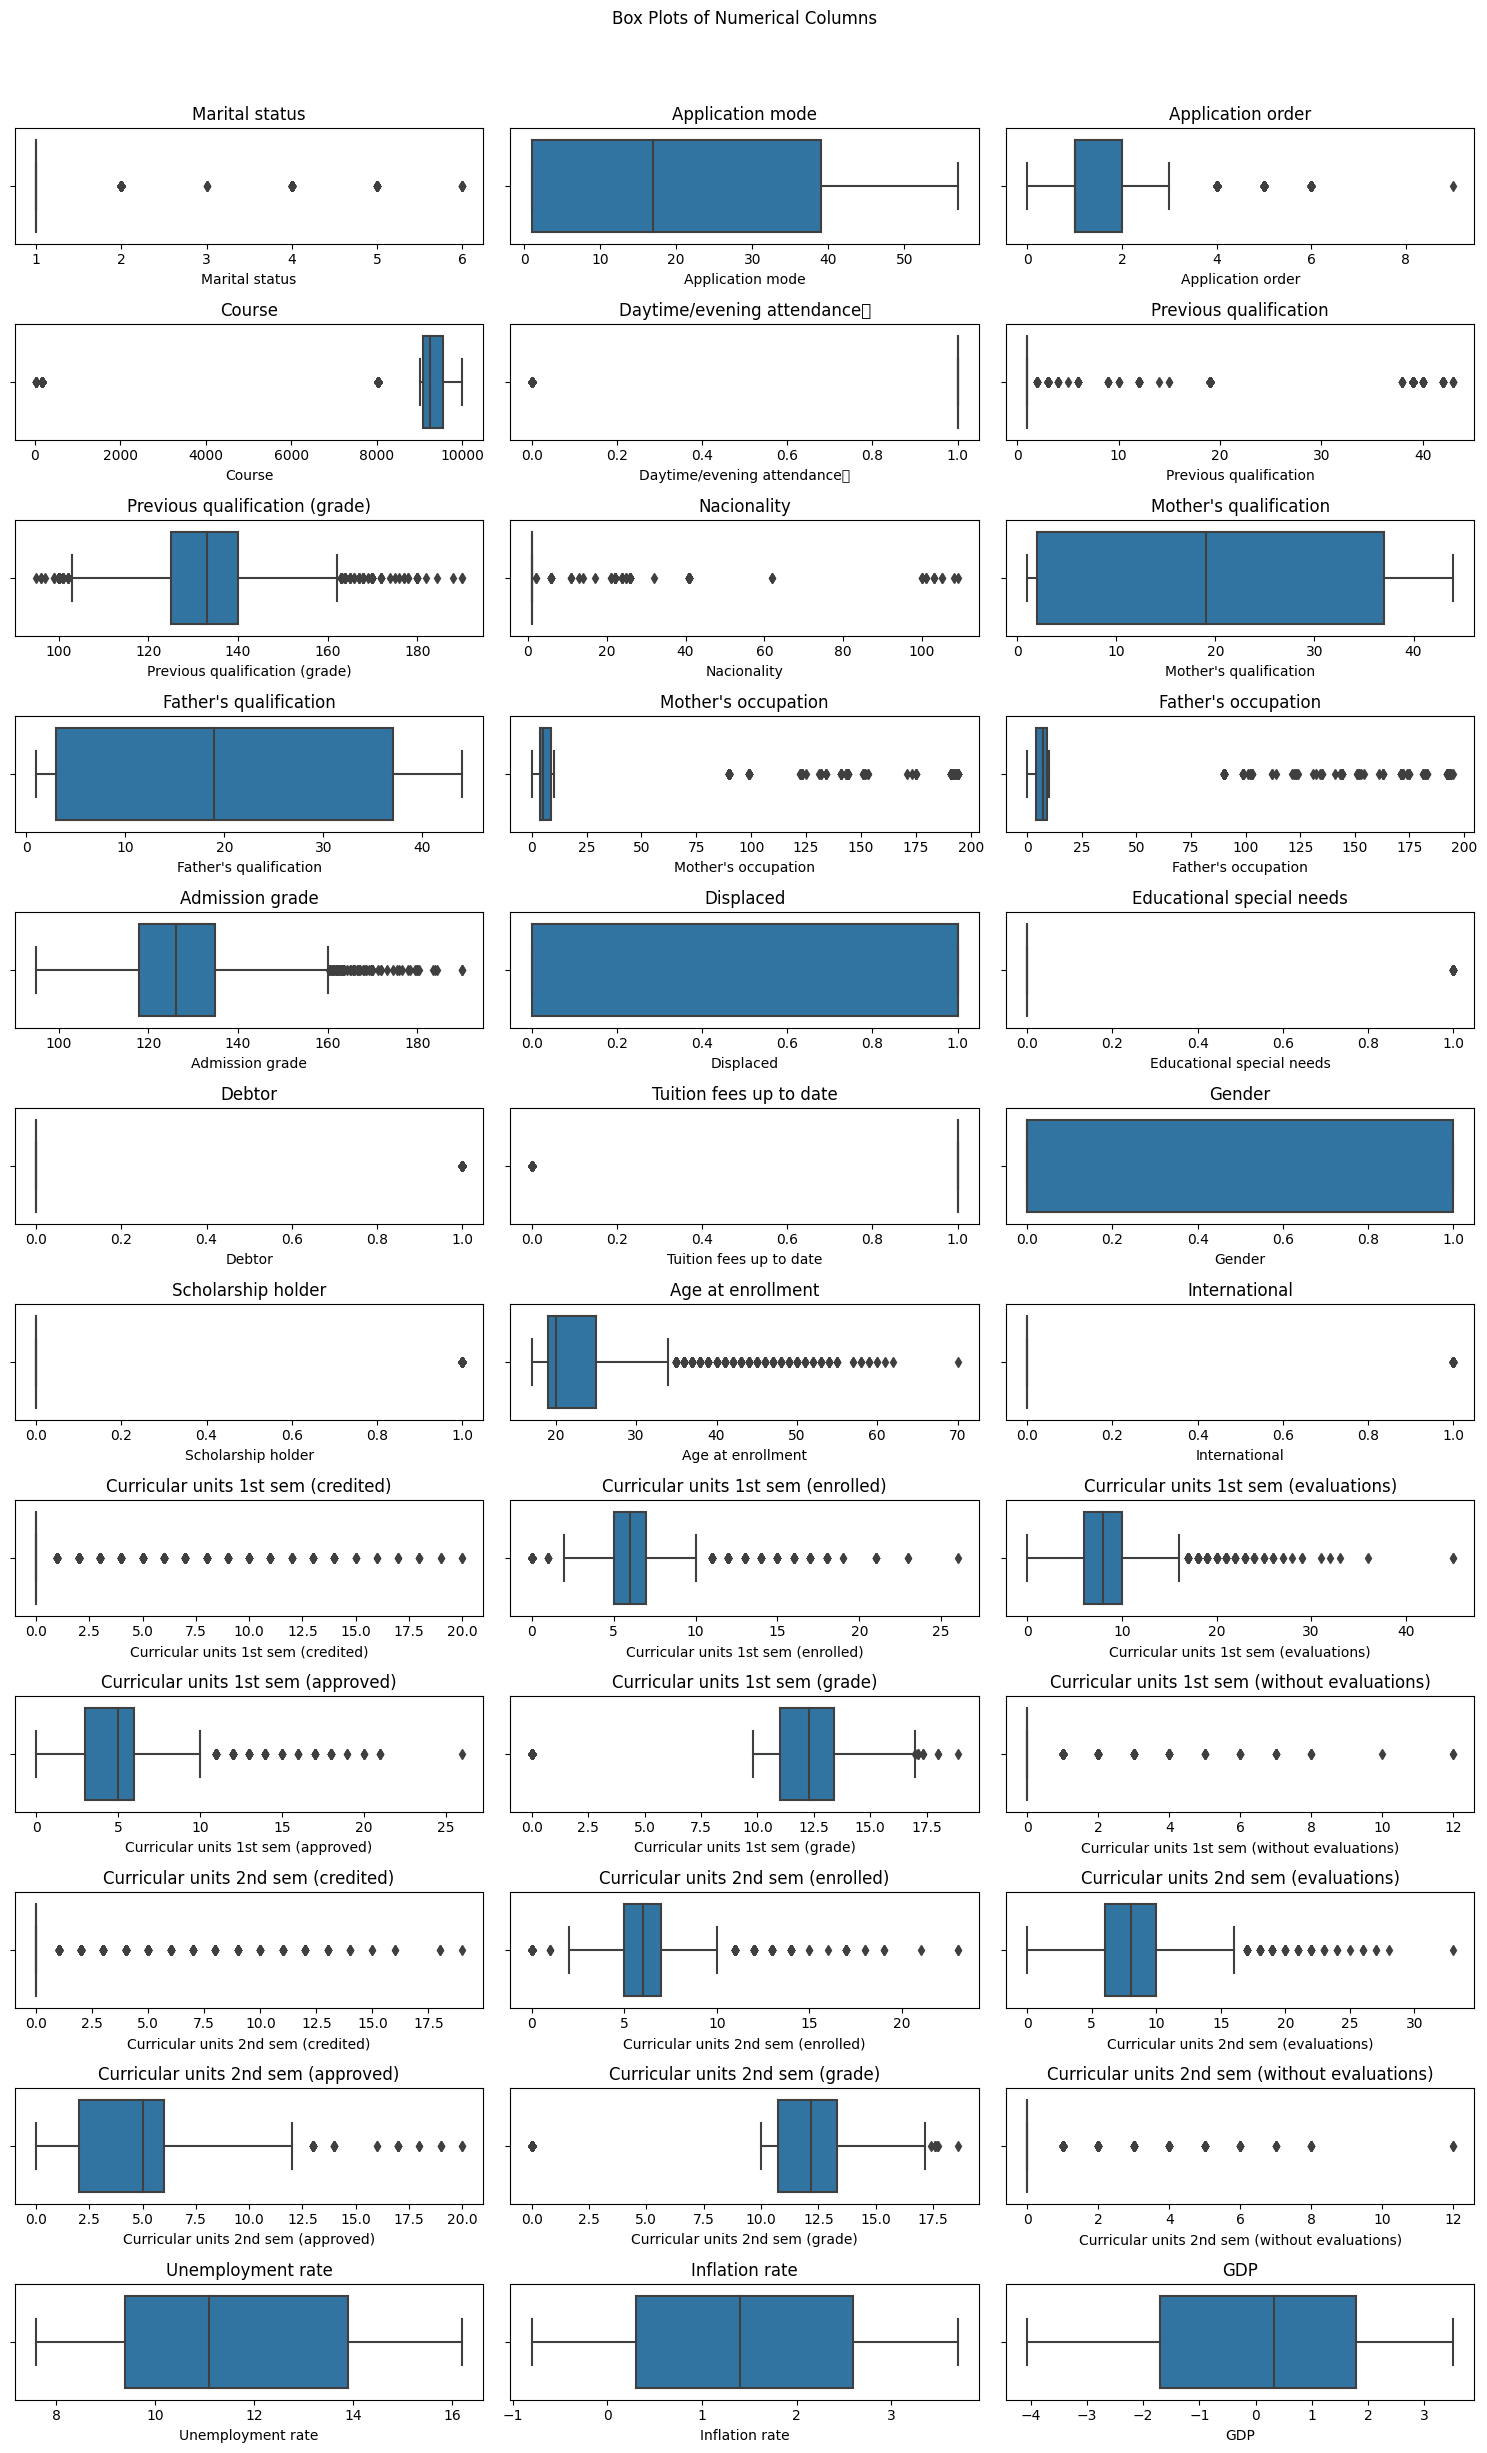

In [ ]:
# Select numerical columns
numerical_columns_2 = df_student.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for the grid
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (len(numerical_columns_2) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 24))
fig.suptitle('Box Plots of Numerical Columns', y=1.02)

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns_2):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.boxplot(x=df_student[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)

# Remove empty subplots if there are any
for i in range(len(numerical_columns_2), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()


## ****Exploratory Data Analysis (EDA)****

## Check the Target Column

In [ ]:
df_student.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

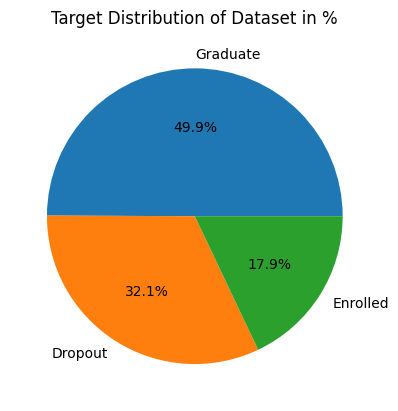

In [ ]:
#store the value counts in a variable
students_target = df_student['Target'].value_counts()

#visualize the target variable
plt.pie(students_target, labels=students_target.index, autopct='%2.1f%%')
plt.title('Target Distribution of Dataset in %')
plt.show()

Approximately 50% of students in the data have graduated

## Demographics


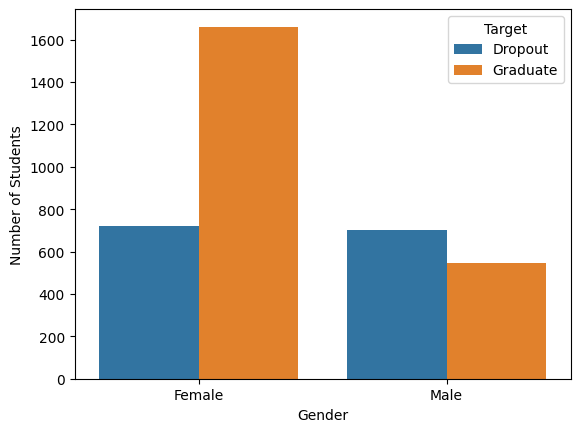

In [ ]:
#gender affecting academic status of students
sns.countplot(data=df_student, x='Gender', hue='Target', hue_order=['Dropout', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Number of Students')
plt.show()

According to the data, females have the highest number of graduants but also have the highest number of dropouts compared to males.

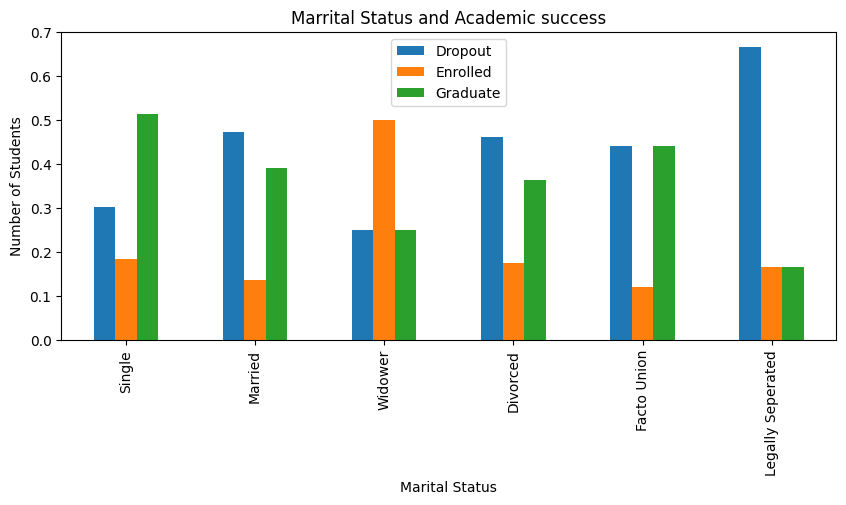

In [ ]:
# Marital Status affecting the academic success of students
pd.crosstab(df_student["Marital status"], df_student["Target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Marrital Status and Academic success" )
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])

plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.legend(loc=9)
plt.show()

The following deductions can be made from the above bar graph:
* Students who are legally seperated stand a high chance of dropping out.
* Single students have more chance of graduating as their focus
* Marriend and divorced individuals have more chances of dropping out but the gap between dropping out and graduating is small.

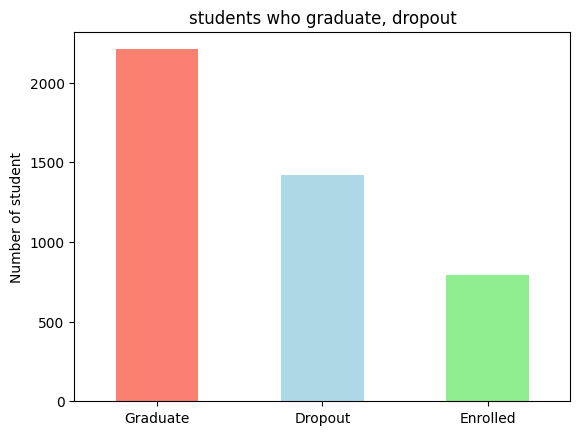

In [ ]:
# how many of each class there in Target column
df_student.Target.value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen'])
plt.title("students who graduate, dropout")
plt.ylabel("Number of student")
plt.xticks(rotation=0);

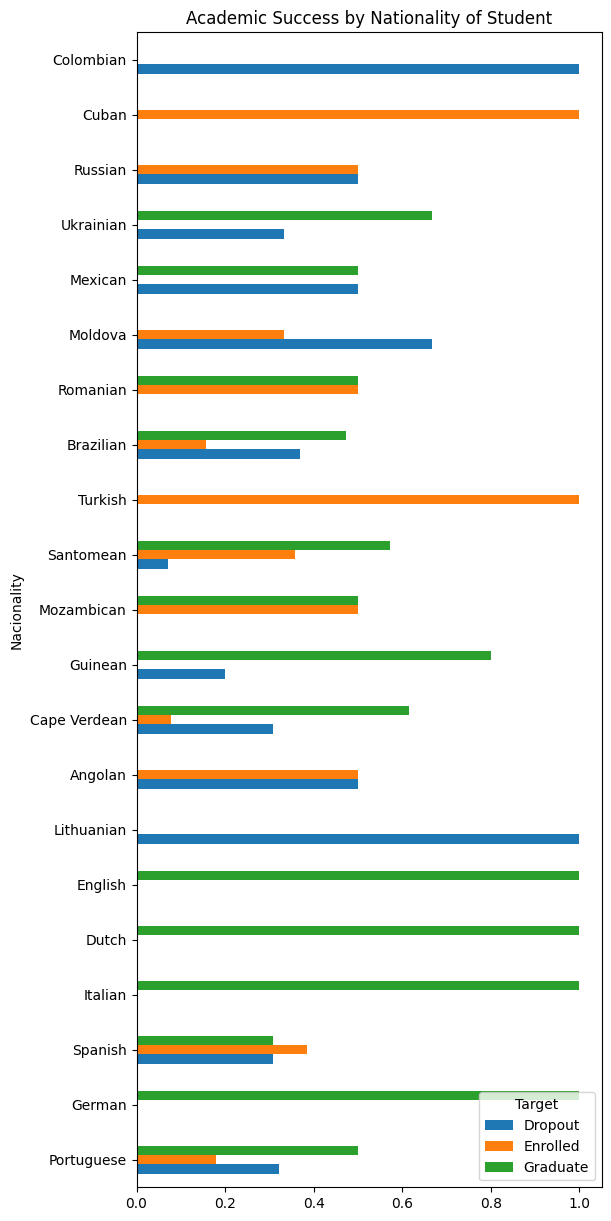

In [ ]:
# Nationality Status affecting Academic Progress of student

pd.crosstab(df_student["Nacionality"], df_student["Target"], normalize='index').plot(kind="barh", figsize=(6,15), title="Academic Success by Nationality of Student")
plt.yticks(range(0,21), ['Portuguese', 'German', 'Spanish', 'Italian', 'Dutch', 'English', 'Lithuanian', 'Angolan', 'Cape Verdean', 'Guinean', 'Mozambican', 'Santomean', 'Turkish', 'Brazilian', 'Romanian', 'Moldova', 'Mexican', 'Ukrainian', 'Russian', 'Cuban', 'Colombian'])
plt.show()

<Axes: >

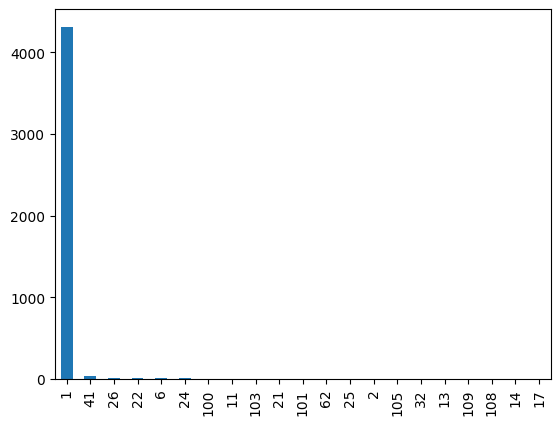

In [ ]:
df_student["Nacionality"].value_counts().plot(kind="bar")

The data comprises of students of portugese descent only, which accounts for the highest frequency among all the nationalities. This means that the nationality feature is not a good predictor or an explanatory variable for the outcome of student dropout. So it can be removed.

In [ ]:
# Create a variable for all the features to be removed
features_to_remove = ['Nacionality']

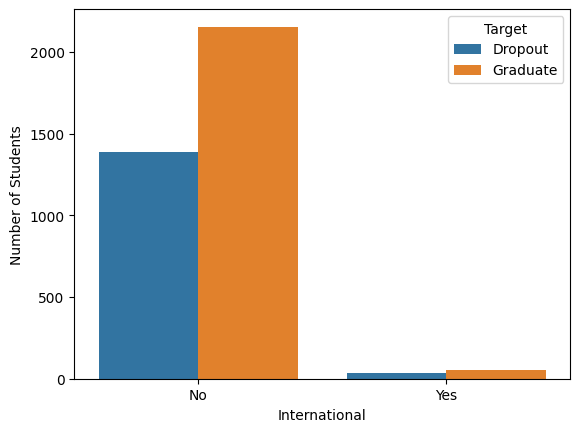

In [ ]:
sns.countplot(data=df_student, x='International', hue='Target', hue_order=['Dropout',  'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

The data is dominated by students of the portugese nationality and thus can explain the above bar plot. The internation feature is also not a good predictor and thus can be removed.

In [ ]:
features_to_remove.extend(['International'])
features_to_remove

['Nacionality', 'International']

In [ ]:
# As we are having more Features lets check first with Attributes Class

# Demographic Data
demographic_df = df_student[["Marital status", "Nacionality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# Socio Economic Data
socio_df = df_student[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# Macro and Academic Enrollment Data
macro_df = df_student[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course',  'Previous qualification', 'Target']]

# Academic Data
academic_df = df_student[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]


<ipython-input-255-bec0822cdc4e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(demographic_df.corr(), annot=True, cmap="coolwarm")


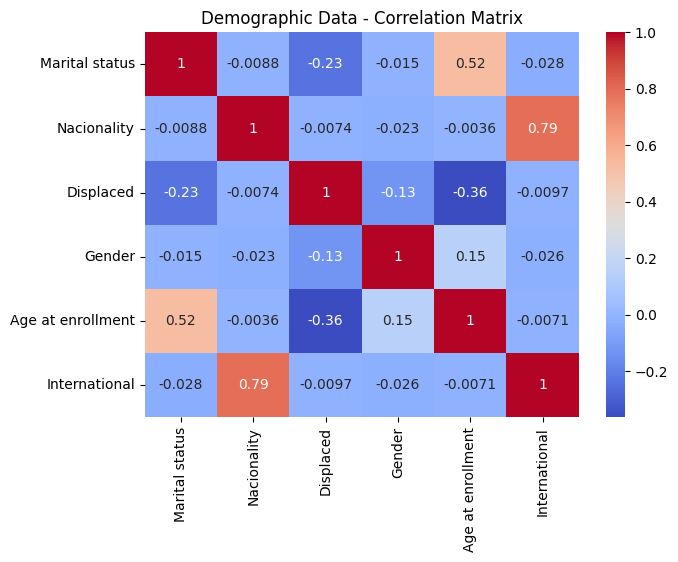

In [ ]:
# Correlation Matrix for Demographic Data

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(demographic_df.corr(), annot=True, cmap="coolwarm")
plt.title("Demographic Data - Correlation Matrix")
plt.show()

Here, International and Nationality is having 0.92 Correlation, But anyway we are removing Nationality feature
All other features seems to be normally related with our Target

<ipython-input-256-f18f96cc212a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(socio_df.corr(), annot=True, cmap="YlGnBu", fmt='.3f')


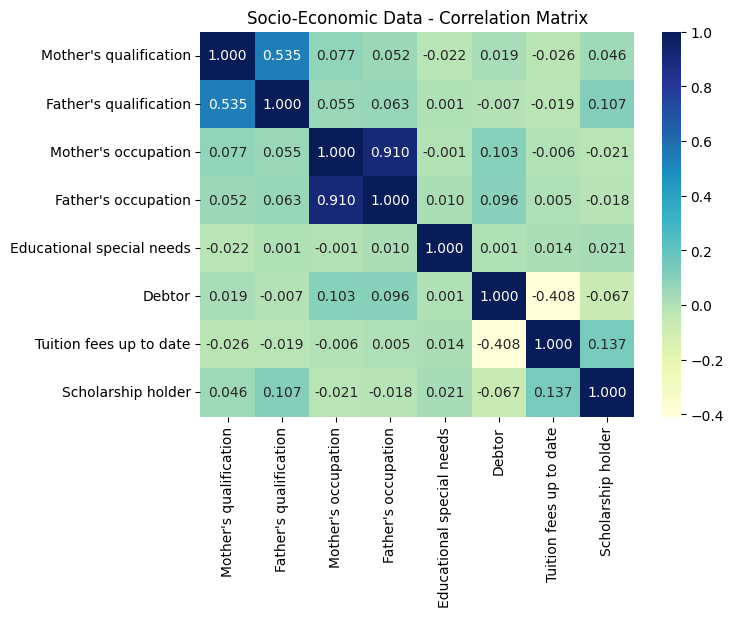

In [ ]:
# Correlation Matrix for Socio-Economic Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(socio_df.corr(), annot=True, cmap="YlGnBu", fmt='.3f')
plt.title("Socio-Economic Data - Correlation Matrix")
plt.show()

Parent's Occupation is correlated with each other with correlation value of 0.69, But as of now we are keeping both

<ipython-input-257-a9908dadab3e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(macro_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')


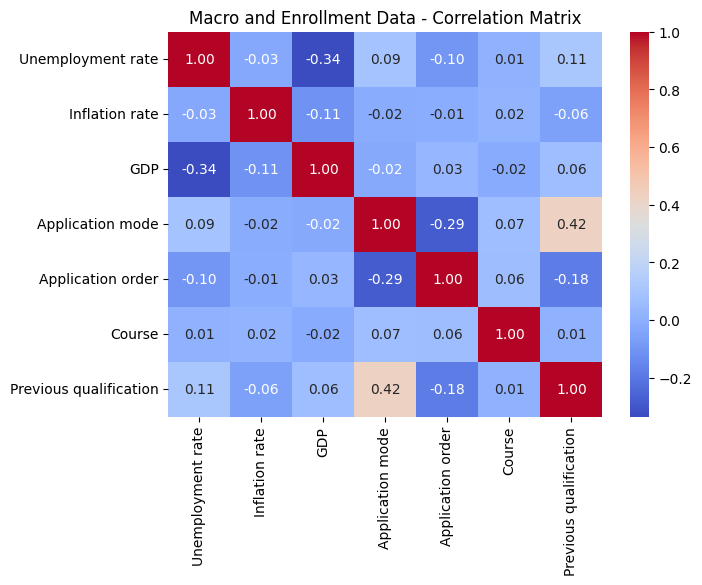

In [ ]:
# Correlation Matrix for Macro and Academic enrollment Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(macro_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Macro and Enrollment Data - Correlation Matrix")
plt.show()

Everything is under control here

<ipython-input-258-1907284e5fd6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(academic_df.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws={"size": 7.5})


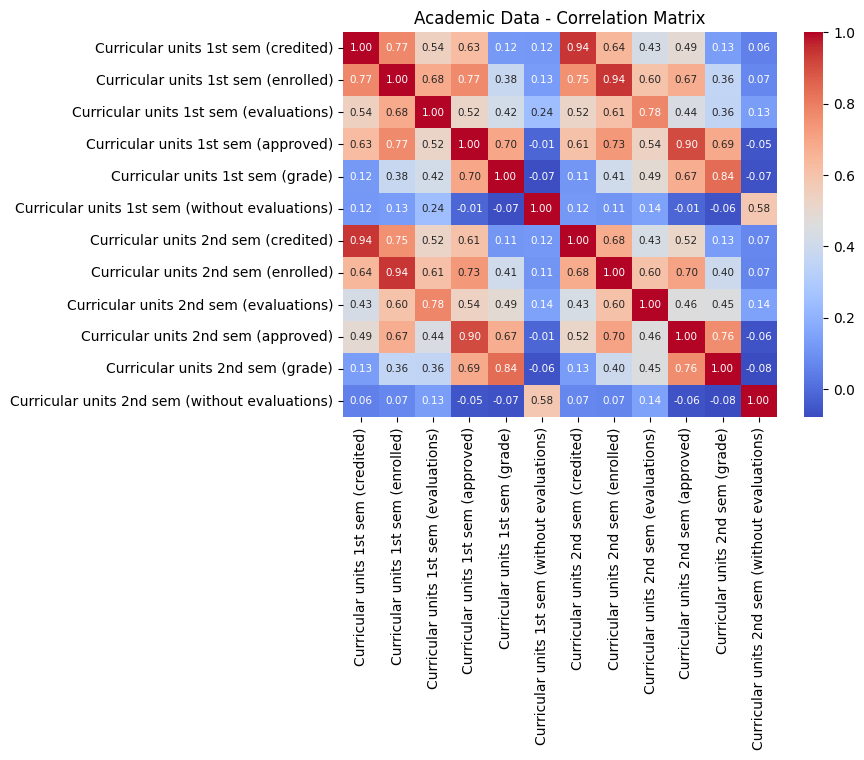

In [ ]:
# Correlation Matrix for Academic Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(academic_df.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws={"size": 7.5})
plt.title("Academic Data - Correlation Matrix")
plt.show()

Features that can be removed -
Curricular units 1st sem (credited) (0.95 correlation with sem 2)
Curricular units 1st sem (enrolled) (0.94 correlation with sem 2)
Curricular units 1st sem (evaluation) (0.79 correlation with sem 2)
Curricular units 1st sem (approved) (0.92 correlation with sem 2)
Curricular units 1st sem (grade) (0.85 correlation with sem 2) (Removing Sem 1 data as sem 2 data is more correlated with our Target Label)

Features with similar correlations that can be removed
* Curricular units 1st sem (credited) correlates with sem 2 = 0.94
* Curricular units 1st sem (enrolled) correlates with sem 2 = 0.94
* Curricular units 1st sem (evaluation) correlates with sem 2 = 0.78
* Curricular units 1st sem (approved) correlates with sem 2 = 0.90
* Curricular units 1st sem (grade) correlates with sem 2 = 0.84¶
Moreover sem 2 data seems to correlate more with the Target variable so let's remove Sem 1 data.

In [ ]:
features_to_remove.extend(["Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)"])

# Other features which are not required for analysis includes the following
features_to_remove.extend(["Mother's qualification","Mother's occupation","Father's occupation","Father's qualification","Application order"])
features_to_remove

['Nacionality',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 "Mother's qualification",
 "Mother's occupation",
 "Father's occupation",
 "Father's qualification",
 'Application order']

In [ ]:
# Perfom deminsionality reducation via drop
df_student.drop(features_to_remove, axis=1, inplace=True)
df_student.head()

,Marital status,Application mode,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,171,1,1,122.0,127.3,1,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,9254,1,1,160.0,142.5,1,0,0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,9070,1,1,122.0,124.8,1,0,0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,9773,1,1,122.0,119.6,1,0,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,8014,0,1,100.0,141.5,0,0,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## **Correlation Analysis**
The relationship between the numerical variables in the dataset is ascertained through the application of correlation analysis. Correlation is a statistical measure used to express how linearly connected two variables are.

### Correlation Matrix
A correlation matrix can be used statistically to analyze the relationship between two variables in a data set. The correlation coefficient in each cell of the matrix, which is a table, represents the strength of the relationship between the variables (0 being neutral, -1 being weak, and 1 being strong).

<ipython-input-261-4efcb7ea8e23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_student.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


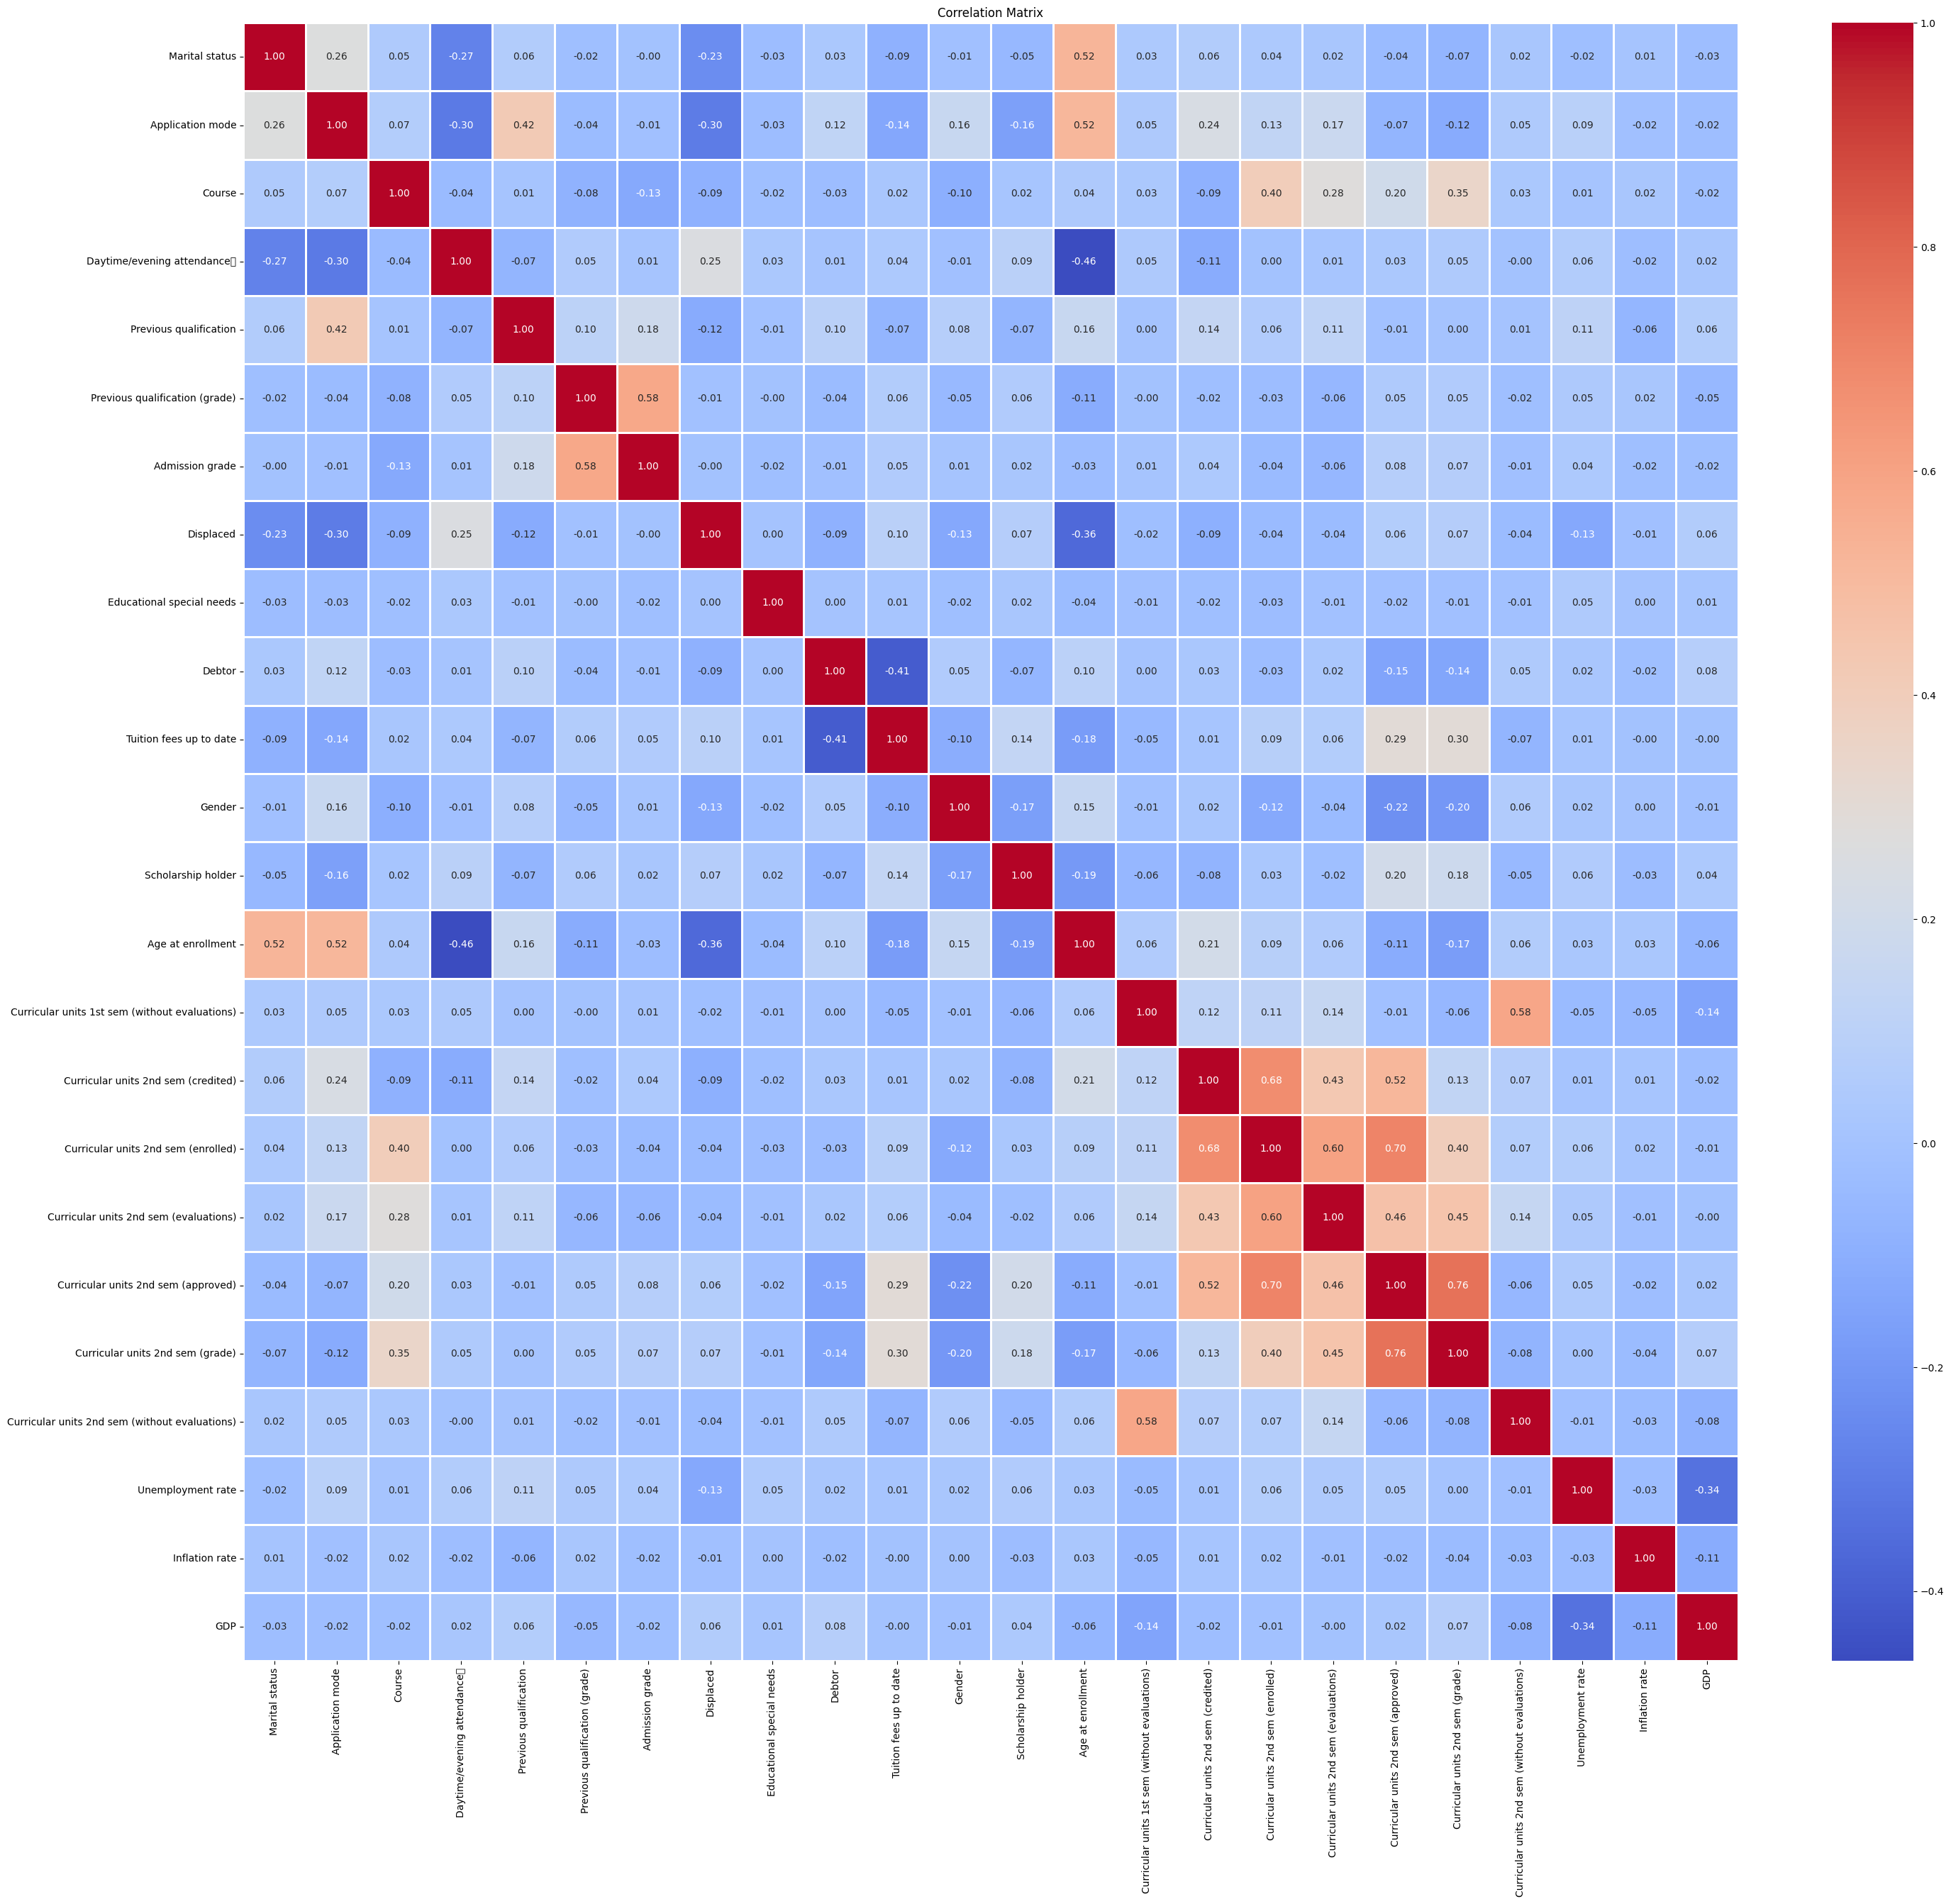

In [ ]:
### Correlation Matrix of the data frame
correlation_matrix = df_student.corr()
plt.figure(figsize=(34, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_student.corr()

<ipython-input-262-f5cb6c46c15a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_student.corr()


,Marital status,Application mode,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,0.046365,-0.274939,0.062529,-0.022406,-0.004771,-0.234886,-0.028343,0.034304,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,0.065385,-0.304092,0.422411,-0.039020,-0.013271,-0.301197,-0.030779,0.122818,...,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Course,0.046365,0.065385,1.000000,-0.043151,0.006654,-0.081013,-0.125058,-0.087399,-0.018795,-0.032673,...,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance\t,-0.274939,-0.304092,-0.043151,1.000000,-0.071871,0.052597,0.007970,0.251767,0.031017,0.006658,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,0.006654,-0.071871,1.000000,0.104072,0.184183,-0.115188,-0.010461,0.095104,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.081013,0.052597,0.104072,1.000000,0.580444,-0.011001,-0.001458,-0.037507,...,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Admission grade,-0.004771,-0.013271,-0.125058,0.007970,0.184183,0.580444,1.000000,-0.000543,-0.018306,-0.014423,...,0.009033,0.040225,-0.041878,-0.057132,0.076659,0.074402,-0.013254,0.038756,-0.021624,-0.019519
Displaced,-0.234886,-0.301197,-0.087399,0.251767,-0.115188,-0.011001,-0.000543,1.000000,0.004395,-0.089901,...,-0.021671,-0.091738,-0.041823,-0.038839,0.063698,0.069087,-0.035959,-0.130327,-0.012385,0.062875
Educational special needs,-0.028343,-0.030779,-0.018795,0.031017,-0.010461,-0.001458,-0.018306,0.004395,1.000000,0.001343,...,-0.012324,-0.021671,-0.028777,-0.010851,-0.016315,-0.012761,-0.007491,0.046131,0.004396,0.012016
Debtor,0.034304,0.122818,-0.032673,0.006658,0.095104,-0.037507,-0.014423,-0.089901,0.001343,1.000000,...,0.001812,0.025414,-0.029436,0.024201,-0.146977,-0.139424,0.048552,0.021128,-0.021888,0.075050


In [ ]:
# Let's display the summary statistics for the numerical columns
df_student.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.00,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.00,39.000000,57.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.00,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.00,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.00,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.10,140.000000,190.000000
Admission grade,4424.0,126.978119,14.482001,95.00,117.90,126.10,134.800000,190.000000
Displaced,4424.0,0.548373,0.497711,0.00,0.00,1.00,1.000000,1.000000
Educational special needs,4424.0,0.011528,0.106760,0.00,0.00,0.00,0.000000,1.000000
Debtor,4424.0,0.113698,0.317480,0.00,0.00,0.00,0.000000,1.000000




# Classification
## Provide data
We need to convert the data to make it suitable for a Classification Task. To do this, we binarise the relative_humidity_3pm to 0 or 1.
Note that in the code below, we multiply the boolean Series by 1 to convert True values to 1 and False values to 0. This is a common technique to convert boolean values to
numeric values (1 for True, 0 for False).


convert from categorical to number in target column

Using LabelEncoder from scikit-learn:
If your categorical column is of type object, you can use LabelEncoder from scikit-learn to convert it to numerical values.
This method assigns 0 and 1 based on the alphabetical order of your categories.

In [ ]:
# becase we need just to know who graduate and dropout so we do not need enrolled.
df_student=df_student[df_student.Target!='Enrolled']

In [ ]:
df_student

,Marital status,Application mode,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,171,1,1,122.0,127.3,1,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,9254,1,1,160.0,142.5,1,0,0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,9070,1,1,122.0,124.8,1,0,0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,9773,1,1,122.0,119.6,1,0,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,8014,0,1,100.0,141.5,0,0,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,9773,1,1,125.0,122.2,0,0,0,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,9773,1,1,120.0,119.0,1,0,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,9500,1,1,154.0,149.5,1,0,0,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,9147,1,1,180.0,153.8,1,0,0,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_column' is the name of your categorical column
label_encoder = LabelEncoder()
df_student['Target'] = label_encoder.fit_transform(df_student['Target'])

<ipython-input-266-2a69c36d8772>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['Target'] = label_encoder.fit_transform(df_student['Target'])


In [ ]:
df_student['Target']

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64

Data Splitting

In [ ]:
X = df_student.drop('Target', axis=1)
y = df_student['Target']

In [ ]:
X.head()

,Marital status,Application mode,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,171,1,1,122.0,127.3,1,0,0,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,9254,1,1,160.0,142.5,1,0,0,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,9070,1,1,122.0,124.8,1,0,0,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,9773,1,1,122.0,119.6,1,0,0,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,8014,0,1,100.0,141.5,0,0,0,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

### Perform Test and Train split
Remember that in the training phase, the learning algorithm uses the training data to adjust the model’s parameters to minimize errors. Upon completion of the training phase,
you will have the trained model.
In the testing phase, the trained model is applied to test data. The test data are separate from the training data. Test data are previously unseen by the model. The model is
then evaluated on how it performs on the test data. The goal in building a classifier model is to have the model perform well on training as well as test data!

In [ ]:
# split data in train and test set
# X = input data, y = output labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (2904, 24)
The shape of X_test is (726, 24)
The shape of y_train is (2904,)
The shape of y_test is (726,)


## Classification Models
we will use the following classification models to predict the student dropout:
* Logistic Regression
* K-Nearest Neighbors
* Decision Tree Classifier
* Support Vector Machine

In [ ]:
# Create a function to build our models
def models(X_train, y_train):

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn= KNeighborsClassifier(n_neighbors = 8, weights='distance')
    knn.fit(X_train, y_train)

     # Decision Trees
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)

    # Support Vector Machine
    svm = SVC()
    svm.fit(X_train, y_train)

    return lr,  knn,dt,svm

lr, knn,dt,svm = models(X_train, y_train)

# prediction
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

In [ ]:
# Create a function to evaluate the models
def evaluate_models(X_test, y_test, models):
    results = [] # A list to store the evaluation results of each model
    for name, model in models.items():

        # make prediction on the test data
        y_pred = model.predict(X_test)

        # calculate the evaluation metric scores
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # store the results in a list of dictionary
        results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

    # Convert the lit of dictionaries to a pandas DataFrame
    return pd.DataFrame(results)

# define a dict containing the trained models for each algorithm
models = {'Logistic Regression': lr, 'Decision Tree': dt,  'KNN': knn, 'Support Vector Machine':svm}

# call the evaluate models function on the test data and models dictionary
results_df = evaluate_models(X_test, y_test, models)

print(results_df)

                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.858127   0.833977  0.962138
1           Decision Tree  0.842975   0.881549  0.861915
2                     KNN  0.805785   0.808000  0.899777
3  Support Vector Machine  0.618457   0.618457  1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for LogisticRegression:


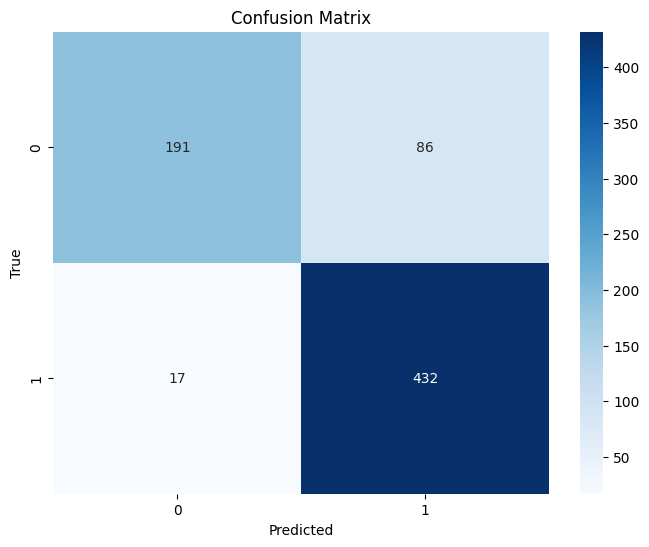

Model Score for LogisticRegression: 0.86
Accuracy for LogisticRegression: 0.8581
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       277
           1       0.83      0.96      0.89       449

    accuracy                           0.86       726
   macro avg       0.88      0.83      0.84       726
weighted avg       0.87      0.86      0.85       726


Confusion Matrix for DecisionTreeClassifier:


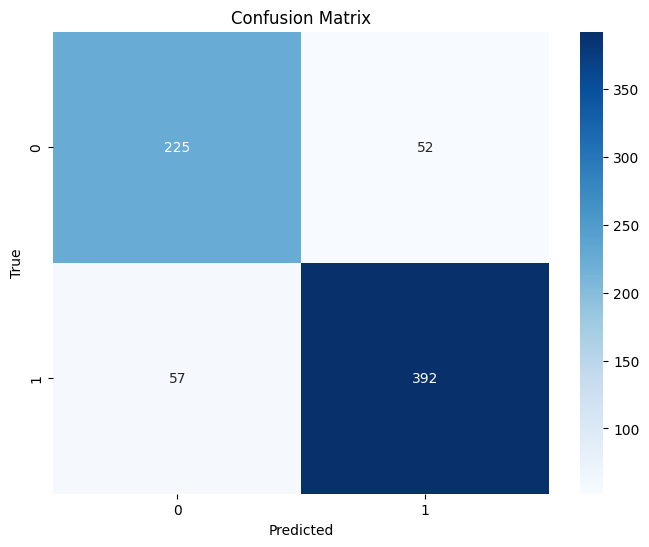

Model Score for DecisionTreeClassifier: 0.85
Accuracy for DecisionTreeClassifier: 0.8499
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       277
           1       0.88      0.87      0.88       449

    accuracy                           0.85       726
   macro avg       0.84      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726


Confusion Matrix for KNeighborsClassifier:


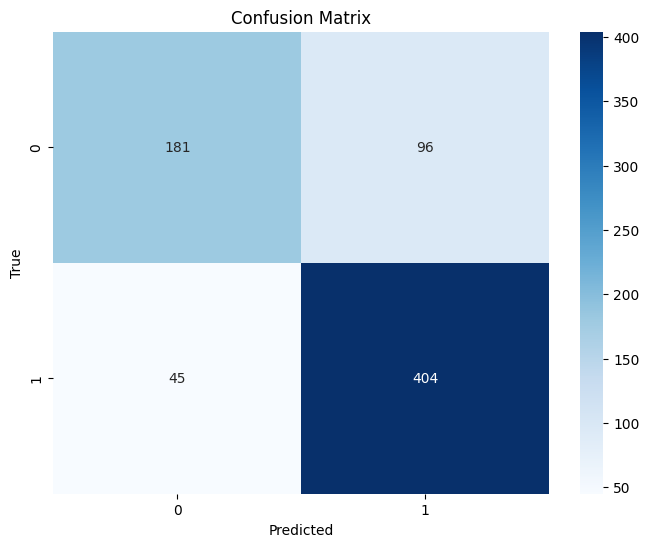

Model Score for KNeighborsClassifier: 0.81
Accuracy for KNeighborsClassifier: 0.8058
Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       277
           1       0.81      0.90      0.85       449

    accuracy                           0.81       726
   macro avg       0.80      0.78      0.79       726
weighted avg       0.81      0.81      0.80       726


Confusion Matrix for SVC:


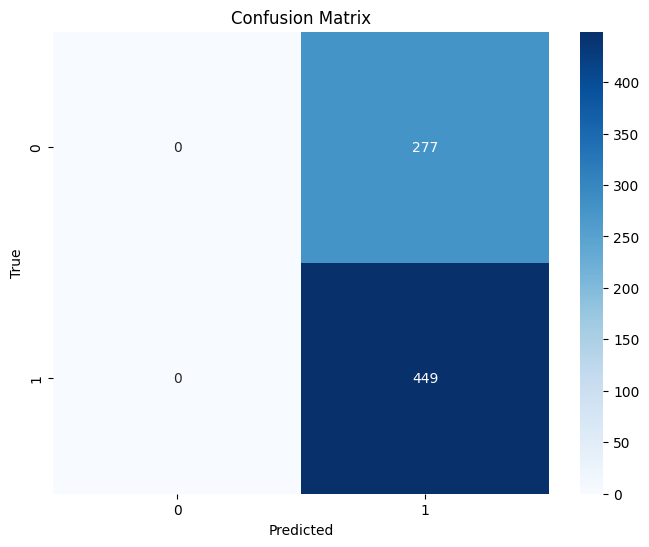

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Score for SVC: 0.62
Accuracy for SVC: 0.6185
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       277
           1       0.62      1.00      0.76       449

    accuracy                           0.62       726
   macro avg       0.31      0.50      0.38       726
weighted avg       0.38      0.62      0.47       726




In [ ]:

# Create a list of classifiers
classifiers = [lr,dt, knn, svm]

# Loop through each classifier, fit the model, make predictions, and print the confusion matrix
for classifier in classifiers:
    # Fit the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Get the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print classifier name
    print(f"Confusion Matrix for {classifier.__class__.__name__}:")

    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print additional metrics if needed
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    score = classifier.score(X_test , y_test)

    print(f"Model Score for {classifier.__class__.__name__}: {score:.2f}")
    print(f"Accuracy for {classifier.__class__.__name__}: {accuracy:.4f}")
    print(f"Classification Report for {classifier.__class__.__name__}:\n{classification_rep}\n")


we will find the best model by plotting bar graph of accuracy and F1 score of all the models.

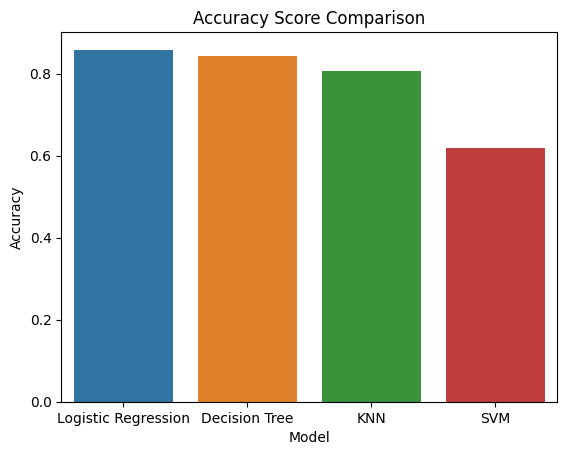

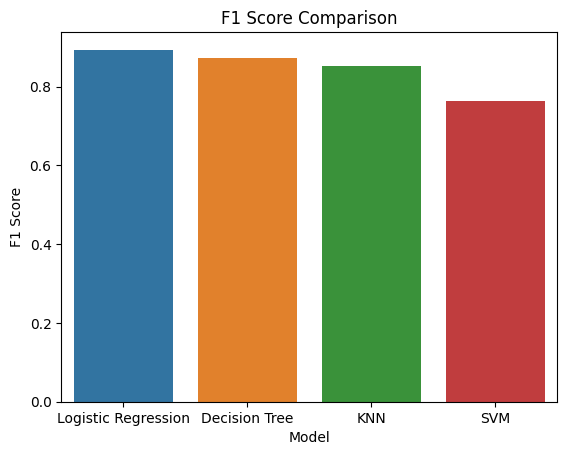

In [ ]:
accuracy = pd.DataFrame(
    {'Model': ['Logistic Regression','Decision Tree','KNN', 'SVM',],
     'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn),
                  accuracy_score(y_test, y_pred_svm)],
     'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_knn),
                  f1_score(y_test, y_pred_svm)]}
)

sns.barplot(x='Model', y='Accuracy', data=accuracy)
plt.title('Accuracy Score Comparison')
plt.show()

sns.barplot(x='Model', y='F1 Score', data=accuracy)
plt.title('F1 Score Comparison')
plt.show()

In [ ]:
# fit the model on train set
student_Data = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
student_Data.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

# **RESULTS AND DISCUSSIONS**

As part of this Exploratory Data Analysis, we have process the data cleaning, transformation, handled the missing values in the data set, summarize the descriptive statistics and visualize the variables. We have identified the different type of variables that have impact on the sale price of the house.

### **Key Findings**

From the above analysis, we identify the below:
*   The distribution of the house price shows slightly positive skweness.
*   The Overall Quality of the house is highly correlated with the sale price which indicates that the house price increases with increase in the overall quality of the house.
*   The living area of the property has good correlation with the sale price indicating that larger the area higher the sale price.
*   As the year increases, the sale price of the property also increases with higher average of sale price from the year 1980.
*   The cost of homes varies significantly between neighborhoods.
*   The outliers are handled by using z-score and scatter plots.

### **Interpretation**
The observed patterns and correlations provide valuable insights into the factors influencing housing prices. For instance, the analysis highlighted the impact of variables such as overall quality, living area, garage size, and neighborhood on sale prices.

###  **Limitations / Recommendations**
We cannot drop the null values in the dataframe as it is having greater impact on our house prices data set rather we impute the null values for the missing data in our data set. Few columns have higher percentage of null values. Recommendations for further analysis is exploring additional datasets, conducting a more in-depth investigation into specific features to collect the data with less null values.



### **References**
[1] Jake VanderPlas, Python Data Science Handbook, 2nd ed., O'Reilly Media, Inc, 2022.
<br/>
[https://www.kaggle.com/code/viroviro/house-price-prediction](https://)
<br>
[https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/](https://)
<br/>
[https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#what-is-an-outlier](https://)
